# Speciale matrices

Sommige speciale types van matrices zijn zeer bruikbaar in de context van Machine Learning.

(target-square-matrix)=
## Vierkante matrix
Een **vierkante matrix** is een matrix met evenveel rijen als kolommen. **Een matrix $\pmb{V}_{m \times n}$ is vierkant als en slechts als $m = n$**.
Geometrisch gezien, doen ze dienst als transformatoren van vectoren, meer bepaald om die te schalen, reflecteren en/of te roteren. Welke transformatie precies gebeurt, kan afgeleid worden van de zogenaamde _determinant_.
In het geval van een $2 \times 2$ matrix (2D ruimte):
$$
\pmb{A} = \begin{bmatrix}
a & b \cr
c & d
\end{bmatrix}
$$
wordt de determinant $det(\pmb{A})$ bekomen door:
$$
det(\pmb{A}) = ad - bc
$$
In het geval van een $3 \times 3$ matrix (3D ruimte):
$$
\pmb{A} = \begin{bmatrix}
a & b & c \cr
d & e & f \cr
g & h & i
\end{bmatrix}
$$
is de formule iets complexer:
$$
det(\pmb{A}) = aei + bfg + cdh - ceg - bdi - afh
$$
Specifieke gevallen:
- $|det| = 1$: De transformatie behoudt afstanden en hoeken.
- $det = 1$: Rotatie.
- $det = -1$: Reflectie.
- $|det| > 1$: De transformatie vergroot afstanden en/of hoeken.
- $|det| < 1$: De transformatie verkleint afstanden en/of hoeken.
- $det > 0$: Geen reflectie.
- $det < 0$: Reflectie
- $det = 0$: De matrix drukt de ruimte samen naar een lagere dimensie $n-1$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

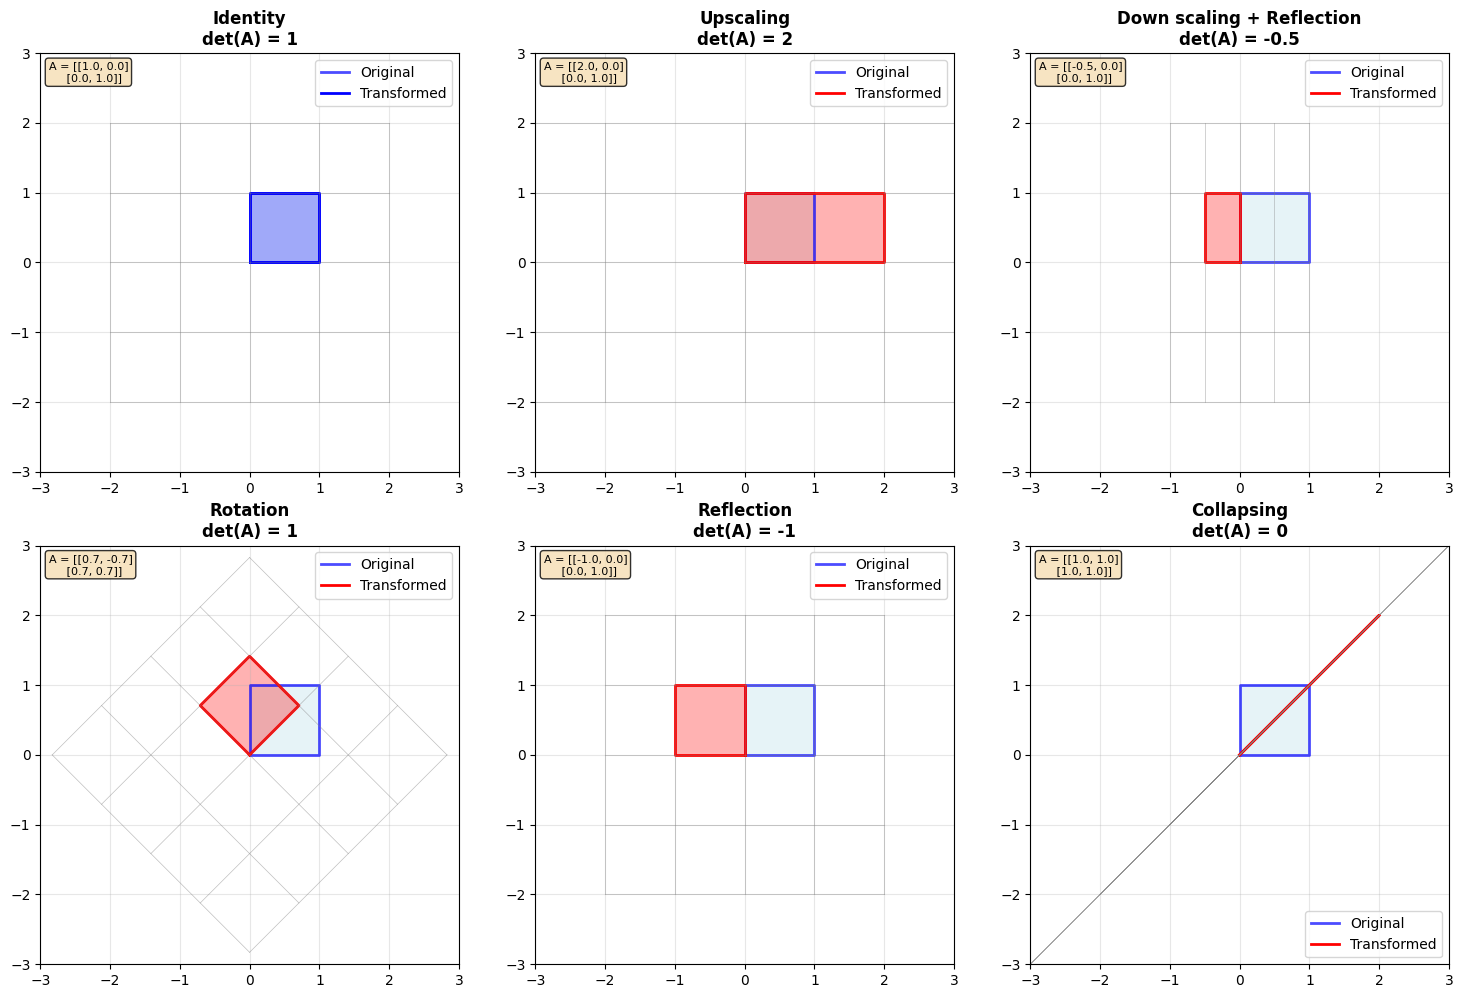

In [7]:
# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# fig.suptitle(
#     "2D Matrix transformations with different determinants", fontsize=16, fontweight="bold"
# )

# Define original unit square
unit_square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])


def create_grid(ax, transformed_square, matrix, det_val, title, color="red"):  # noqa: PLR0913
    """Create grid lines for visualisation."""
    # Plot original unit square
    ax.plot(unit_square[0], unit_square[1], "b-", linewidth=2, alpha=0.7, label="Original")
    ax.fill(unit_square[0], unit_square[1], "lightblue", alpha=0.3)
    # Plot transformed square
    ax.plot(
        transformed_square[0], transformed_square[1], color=color, linewidth=2, label="Transformed"
    )
    ax.fill(transformed_square[0], transformed_square[1], color, alpha=0.3)

    # Add grid lines
    for i in range(-2, 3):
        # Vertical lines
        line_v = np.array([[i, i], [-2, 2]])
        transformed_line_v = matrix @ line_v
        ax.plot(transformed_line_v[0], transformed_line_v[1], "gray", alpha=0.5, linewidth=0.5)

        # Horizontal lines
        line_h = np.array([[-2, 2], [i, i]])
        transformed_line_h = matrix @ line_h
        ax.plot(transformed_line_h[0], transformed_line_h[1], "gray", alpha=0.5, linewidth=0.5)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect("equal")
    ax.grid(True, alpha=0.3)
    ax.set_title(f"{title}\ndet(A) = {det_val}", fontweight="bold")
    ax.legend()

    # Add matrix text
    matrix_str = f"A = [[{matrix[0, 0]:.1f}, {matrix[0, 1]:.1f}]\n     [{matrix[1, 0]:.1f}, {matrix[1, 1]:.1f}]]"
    ax.text(
        0.02,
        0.98,
        matrix_str,
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment="top",
        bbox={"boxstyle": "round", "facecolor": "wheat", "alpha": 0.8},
    )


# 1. Original (Identity matrix)
matrix1 = np.array([[1, 0], [0, 1]])
transformed1 = matrix1 @ unit_square
create_grid(axes[0, 0], transformed1, matrix1, 1, "Identity", "blue")

# 2. det > 0 (scaling without reflection)
matrix2 = np.array([[2, 0], [0, 1]])
transformed2 = matrix2 @ unit_square
create_grid(axes[0, 1], transformed2, matrix2, 2, "Upscaling")

# 3. det < 0 (scaling with reflection)
matrix3 = np.array([[-0.5, 0], [0, 1]])
transformed3 = matrix3 @ unit_square
create_grid(axes[0, 2], transformed3, matrix3, -0.5, "Down scaling + Reflection")

# 4. det = 1 (rotation, preserve distances and angles)
angle = np.pi / 4  # 45 degrees
matrix4 = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
transformed4 = matrix4 @ unit_square
create_grid(axes[1, 0], transformed4, matrix4, 1, "Rotation")

# 5. det = -1 (reflection, preserve distances and angles)
matrix5 = np.array([[-1, 0], [0, 1]])
transformed5 = matrix5 @ unit_square
create_grid(axes[1, 1], transformed5, matrix5, -1, "Reflection")

# 6. det = 0 (collapse to lower dimension)
matrix6 = np.array([[1, 1], [1, 1]])
transformed6 = matrix6 @ unit_square
create_grid(axes[1, 2], transformed6, matrix6, 0, "Collapsing")

plt.tight_layout()
plt.show()

(target-diagonal-matrix)=
## Diagonale Matrix
Een **diagonale matrix** heeft niet-nul elementen alleen op de hoofddiagonaal. Alle _off_-diagonale elementen zijn nul. **Een matrix $\pmb{D}$ is diagonaal als en slechts als $D_{i,j} = 0$ voor alle $i \neq j$**.
$$
\pmb{D}_{m \times n} = \begin{bmatrix}
D_{1,1} & 0 & 0 & \ldots & 0 \cr
0 & D_{2,2} & 0 & \ldots & 0 \cr
0 & 0 & D_{3,3} & \ldots & 0 \cr
\vdots & \vdots & \vdots & \ddots & \vdots \cr
0 & 0 & 0 & \ldots & D_{n,n} \cr
0 & 0 & 0 & \ldots & 0 \cr
\vdots & \vdots & \vdots & \vdots & \vdots \cr
0 & 0 & 0 & \ldots & 0
\end{bmatrix}
$$

In [25]:
import numpy as np

In [26]:
# Create a diagonal matrix from a vector
diagonal_values = np.array([2, 5, 8])
D = np.diag(diagonal_values)
print("Diagonal Matrix:")
print(D)
print(f"\nDiagonal elements: {np.diag(D)}")

Diagonal Matrix:
[[2 0 0]
 [0 5 0]
 [0 0 8]]

Diagonal elements: [2 5 8]


(target-identity-matrix)=
## Identiteitsmatrix
Een **identiteitsmatrix is een _vierkante_ _diagonaal_ matrix met enkel de waarde $1$ op de hoofddiagonaal**.
$$
\pmb{I}_n = \begin{bmatrix}
1 & 0 & 0 & \ldots & 0 \cr
0 & 1 & 0 & \ldots & 0 \cr
0 & 0 & 1 & \ldots & 0 \cr
\vdots & \vdots & \vdots & \ddots & \vdots \cr
0 & 0 & 0 & \ldots & 1
\end{bmatrix}
$$

In [27]:
# Create a 3x3 identity matrix
I = np.eye(3)
print("3x3 Identity matrix:")
print(I)

3x3 Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


(target-symmetric-matrix)=
## Symmetrische Matrix
Een **symmetrische matrix is gelijk aan zijn transpose**:
$$
\pmb{A} = \pmb{A}^T
$$

In [28]:
# Create a symmetric matrix
S = np.array([[4, 2, 1], [2, 5, 3], [1, 3, 6]])
print("Symmetric Matrix:")
print(S)
print("\nTranspose:")
print(S.T)

Symmetric Matrix:
[[4 2 1]
 [2 5 3]
 [1 3 6]]

Transpose:
[[4 2 1]
 [2 5 3]
 [1 3 6]]


(target-upper-triangular-matrix)=
## _Upper triangular_ matrix
Een **_upper triangular_ matrix** is een vierkante matrix met alle elementen onder de hoofddiagonaal gelijk aan nul. **Een matrix $\pmb{U}^{m \times n}$ is een _upper triangular_ matrix als en slechts als $m = n$ en $U_{i,j} = 0$ voor alle $i < j$**
$$
\pmb{U}_n = \begin{bmatrix}
U_{1,1} & U_{1,2} & U_{1,3} & \ldots & U_{1,n} \cr
0 & U_{2,2} & U_{2,3} & \ldots & U_{2,n} \cr
0 & 0 & U_{3,3} & \ldots & U_{3,n} \cr
\vdots & \vdots & \vdots & \ddots & \vdots \cr
0 & 0 & 0 & \ldots & U_{n,n}
\end{bmatrix}
$$

In [29]:
# Create an upper triangular matrix from a full matrix
A = np.array([[4, 2, 1], [3, 5, 7], [1, 2, 9]])
U = np.triu(A)
print("Original Matrix:")
print(A)
print("\nUpper Triangular:")
print(U)

Original Matrix:
[[4 2 1]
 [3 5 7]
 [1 2 9]]

Upper Triangular:
[[4 2 1]
 [0 5 7]
 [0 0 9]]


(target-lower-triangular-matrix)=
## _Lower triangular_ matrix
Een **_lower triangular_ matrix** is een vierkante matrix met alle elementen boven de hoofddiagonaal gelijk aan nul. **Een matrix $\pmb{L}^{m \times n}$ is een _lower triangular_ matrix als en slechts als $m = n$ en $L_{i,j} = 0$ voor alle $i > j$**
$$
\pmb{L}_n = \begin{bmatrix}
D_{1,1} & 0 & 0 & \ldots & 0 \cr
D_{2,1} & D_{2,2} & 0 & \ldots & 0 \cr
D_{3,1} & D_{3,2} & D_{3,3} & \ldots & 0 \cr
\vdots & \vdots & \vdots & \ddots & \vdots \cr
D_{n,1} & D_{n,2} & D_{n,3} & \ldots & D_{n,n}
\end{bmatrix}
$$

In [30]:
# Create a lower triangular matrix
L = np.tril(A)
print("Original Matrix:")
print(A)
print("\nLower Triangular:")
print(L)

Original Matrix:
[[4 2 1]
 [3 5 7]
 [1 2 9]]

Lower Triangular:
[[4 0 0]
 [3 5 0]
 [1 2 9]]


## Orthogonale matrix
Een orthogonale of orthonormale matrix is een vierkante matrix waarbij de rijen en kolommen orthonomale vectoren zijn. Dit impliceert dat:
$$
\pmb{Q}^T\pmb{Q} = \pmb{Q}\pmb{Q}^T = \pmb{I}
$$
Geometrisch gezien, behouden orthogonale matrices afstanden en hoeken. Wanneer we het inner product nemen van de matrix met een reeks vectoren, behouden de resulterende vectoren hun lengte en onderlinge hoeken. Er kan wel een reflectie optreden:
$$
det(\pmb{Q}) \isin \{-1, 1\}
$$

## Rotatie matrix
Een rotatie matrix is een orthogonale matrix waarbij de determinant $1$ is. Wanneer we het inner product nemen van de matrix met een reeks vectoren, behouden de resulterende vectoren hun lengte en onderlinge hoeken én zal er géén reflectie optreden.
$$
det(\pmb{R}) = 1
$$